# Main Problem
$$\frac{dy}{dx}+(x+\frac{1+3x^2}{1+x+x^3})y=x^3+2x+x^2(\frac{1+3x^2}{1+x+x^3}) \quad x \in (0,1)$$
$$y(0)=1$$

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import matplotlib.pyplot as plt

In [ ]:
def tanh(z):
    return np.tanh(z)

In [ ]:
def legendre_polynomial(x, degree):
    x = np.atleast_1d(x)
    legendre = [np.ones_like(x), x]
    for i in range(2, degree + 1):
        P = ((2 * i - 1) * x * legendre[i - 1] - (i - 1) * legendre[i - 2]) / i
        legendre.append(P)
    return np.stack(legendre, axis=0)

In [ ]:
def forward_Euiler(x,N):
  x0 = 0
  y0 = 1
  xf = 1
  deltax = ( xf-x0 ) / (N-1)
  x = np.linspace( x0 , xf , N)
  y = np.zeros( [ N ] )
  y[0] = y0
  for i in range ( 1 , N ) :
    y [ i ] = deltax*( -(x[i-1]+(1+3*(x[i-1])**2)/(1+x[i-1]+(x[i-1])**3))*y[i-1]+(x[i-1])**3+2*x[i-1]+(x[i-1])**2*((1+3*(x[i-1])**2)/(1+x[i-1]+(x[i-1])**3)) ) + y[i-1]
  return y

In [ ]:
# Assuming one input, hidden, and output layer
def neural_network(params, x, degree):
    w_mid = params

    num_values = np.size(x)
    x_input = x

    ## Hidden layer:
    x_input = legendre_polynomial(x_input, degree-1)
    z_mid = np.matmul(w_mid, x_input)

    x_output = tanh(z_mid)

    return x_output

In [ ]:
# The trial solution using the deep neural network:
def g_trial(x, params, degree, g0 = 1):
    return g0 + (x)*neural_network(params,x,degree)

In [ ]:
# The right side of the ODE:
def g(x, g_trial):
    return -(x+(1+3*x**2)/(1+x+x**3))*g_trial+x**3+2*x+x**2*((1+3*x**2)/(1+x+x**3))

In [ ]:
# The cost function:
def cost_function(P, x, degree):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P,degree)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P,degree)

    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (d_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

In [ ]:
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights

    P = npr.randn(1, num_neurons_hidden)

    print('Initial cost: %g'%cost_function(P, x, num_neurons_hidden))

    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        cost_grad =  cost_function_grad(P, x, num_neurons_hidden)

        P = P - lmb * cost_grad
        if i % 1000 == 0:
            print('Final cost: %g'%cost_function(P, x, num_neurons_hidden))

    return P

In [ ]:
# Solve the given problem
if __name__ == '__main__':
    npr.seed(15)

    N = 80
    x = np.linspace(0, 1, N)
    degree = 5
    num_iter = 10000
    lmb = 0.001
    # Use the network
    P = solve_ode_neural_network(x, degree, num_iter, lmb)

Initial cost: 2.63156
Final cost: 2.43736
Final cost: 0.04631
Final cost: 0.0129054
Final cost: 0.00757869
Final cost: 0.00642899
Final cost: 0.00604142
Final cost: 0.00581128
Final cost: 0.00562038
Final cost: 0.00544427
Final cost: 0.00527752


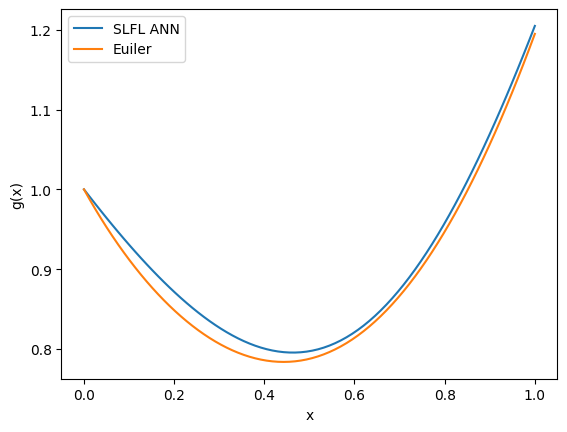

In [ ]:
# Plot the results
res = g_trial(x, P, degree)
res = np.transpose(res)
plt.plot(x, res, label = 'SLFL ANN')
y = forward_Euiler(x,N)
plt.plot(x, y, label = 'Euler')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.show()